# Course 4 Project

### Tasks to do

* Check the correlation matrix and identify most correlated features.

* Find out the Covariance Matrix? Also Identify eigen values and eigen vectors of covariance matrix.

* Find out the two most important Principal Components.
Select only 8 features using PCA.

In [88]:
# importing the necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings('ignore')

In [11]:
# extracting dataset from the zip file

!unzip "/content/Problem Statement - Dimentionality Reduction-Dataset.zip" -d "/content/"

Archive:  /content/Problem Statement - Dimentionality Reduction-Dataset.zip
  inflating: /content/Problem Statement - Dimentionality Reduction-Dataset.csv  


In [33]:
# loading dataset

df = pd.read_csv('/content/Problem Statement - Dimentionality Reduction-Dataset.csv')

In [34]:
# displaying the number of rows and number of columns

print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  550068
No. of columns:  12


In [35]:
# printing the first five rows
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [36]:
# printing the last five rows
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [37]:
# number of unique categories in each columns
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

### Feature engineering

Handling Missing values

In [38]:
# checking for the missing values

print("No. of missing values in each columns: \n")
print(df.isnull().sum())

No. of missing values in each columns: 

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [39]:
# imputing missing values with median

df["Product_Category_2"].fillna(df["Product_Category_2"].median(), inplace=True)
df["Product_Category_3"].fillna(df["Product_Category_3"].median(), inplace=True)

extracting features from Product_ID

In [40]:
df['Product_ID_feature'] = df['Product_ID'].apply(lambda x : x.split('P')[1])

In [41]:
df['Product_ID_feature'] = df['Product_ID_feature'].astype(int)

In [42]:
df[['Product_ID', 'Product_ID_feature']].head(5)

,Product_ID,Product_ID_feature
0,P00069042,69042
1,P00248942,248942
2,P00087842,87842
3,P00085442,85442
4,P00285442,285442


Label encoding Gender

In [43]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [44]:
label_encoder = LabelEncoder()

df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

Extracting feature from Age

In [45]:
# checking the data in the Age column
df['Age'].head()

0    0-17
1    0-17
2    0-17
3    0-17
4     55+
Name: Age, dtype: object

In [46]:
# extracting minimum age and maximum age from the given range
df['min_age'] = 0
df['max_age'] = 0

for i, records in enumerate(df['Age']):
  for element in records:
    if element == '-':
      df['min_age'][i] = df['Age'][i].split('-')[0]
      df['max_age'][i] = df['Age'][i].split('-')[1]
    if element == '+':
      df['min_age'][i] = df['Age'][i].split('+')[0]
      df['max_age'][i] = 100

In [48]:
# displaying age, min_age and max_age columns to check the feature extraction
df[['Age', 'min_age', 'max_age']]

,Age,min_age,max_age
0,0-17,0,17
1,0-17,0,17
2,0-17,0,17
3,0-17,0,17
4,55+,55,100
...,...,...,...
550063,51-55,51,55
550064,26-35,26,35
550065,26-35,26,35
550066,55+,55,100


In [49]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
Product_ID_feature              int64
Gender_encoded                  int64
min_age                         int64
max_age                         int64
dtype: object

mapping for Stay_In_Current_City_Years

In [50]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [51]:
df['Stay_In_Current_City_Years_encoded'] = df['Stay_In_Current_City_Years'].map({'0': 0,
                                                                                 '1': 1,
                                                                                 '2': 2,
                                                                                 '3': 3,
                                                                                 '4+': 4
                                                                                 })

In [52]:
df[['Stay_In_Current_City_Years', 'Stay_In_Current_City_Years_encoded']].head()

,Stay_In_Current_City_Years,Stay_In_Current_City_Years_encoded
0,2,2
1,2,2
2,2,2
3,2,2
4,4+,4


One hot encoding for City_Category

In [53]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [54]:
df_City_category = pd.get_dummies(df['City_Category'])
df1 = pd.concat([df, df_City_category], axis=1, join="inner")

In [55]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID_feature,Gender_encoded,min_age,max_age,Stay_In_Current_City_Years_encoded,A,B,C
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370,69042,0,0,17,2,1,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,248942,0,0,17,2,1,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,14.0,1422,87842,0,0,17,2,1,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057,85442,0,0,17,2,1,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,14.0,7969,285442,1,55,100,4,0,0,1


### Standardisation

Dropping the columns that are already encoded and no more needed

In [89]:
df2 = df1.drop(columns=['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], 
               axis=1)

In [94]:
# Standardise the data
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df2)
df3 = pd.DataFrame(df_scaled, columns=df2.columns)

###**Check the correlation matrix and identify most correlated features.**

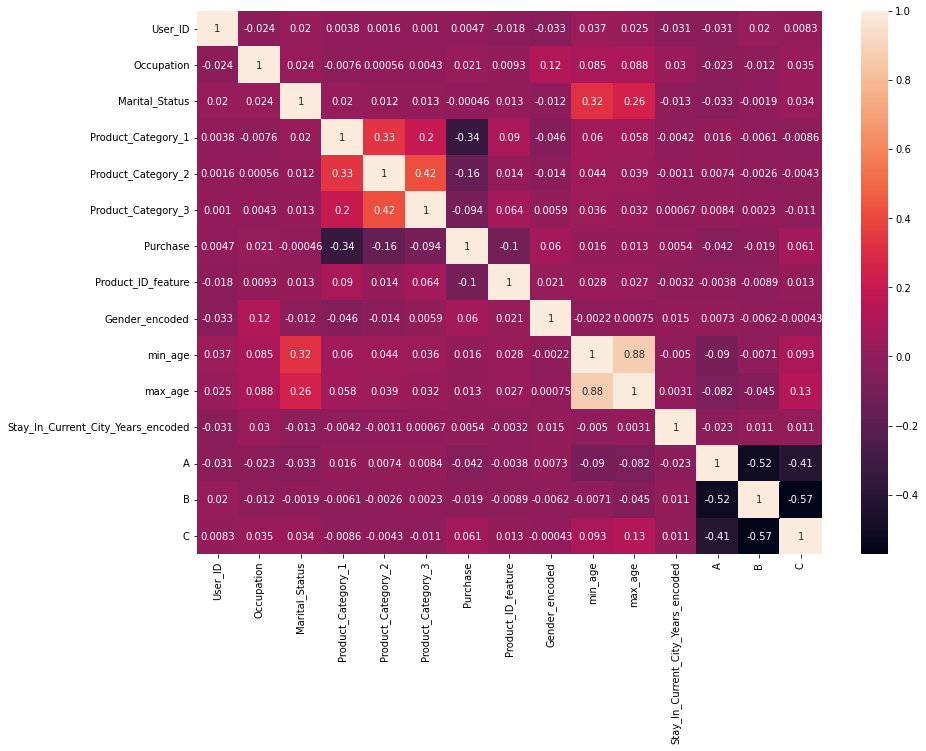

In [95]:
# plotting the correlation matrix

plt.figure(figsize=(14, 10))
correlation_matrix = df3.corr()

ax = sns.heatmap(correlation_matrix, annot=True)

As per the correlation matrix above,

1. Product_Category_2 is very much correlated with Product_Category_1 and Product_Category_3

2. min_age and max_age are highly correlated with each other

3. City_Category A, B and C are very much correlated with each other

###**Find out the Covariance Matrix? Also Identify eigen values and eigen vectors of covariance matrix.**

In [96]:
df3.dtypes

User_ID                               float64
Occupation                            float64
Marital_Status                        float64
Product_Category_1                    float64
Product_Category_2                    float64
Product_Category_3                    float64
Purchase                              float64
Product_ID_feature                    float64
Gender_encoded                        float64
min_age                               float64
max_age                               float64
Stay_In_Current_City_Years_encoded    float64
A                                     float64
B                                     float64
C                                     float64
dtype: object

In [97]:
df3.columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase',
       'Product_ID_feature', 'Gender_encoded', 'min_age', 'max_age',
       'Stay_In_Current_City_Years_encoded', 'A', 'B', 'C'],
      dtype='object')

In [98]:
int_columns = df3[['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Purchase',
       'Product_ID_feature', 'Gender_encoded', 'min_age', 'max_age',
       'Stay_In_Current_City_Years_encoded']].astype('int16')

float_columns = df3[['Product_Category_2', 'Product_Category_3']].astype('float16')

unit_columns = df3[['A', 'B', 'C']]

df4 = pd.concat([int_columns, float_columns, unit_columns], axis=1, join="inner")

In [99]:
df4.dtypes

User_ID                                 int16
Occupation                              int16
Marital_Status                          int16
Product_Category_1                      int16
Purchase                                int16
Product_ID_feature                      int16
Gender_encoded                          int16
min_age                                 int16
max_age                                 int16
Stay_In_Current_City_Years_encoded      int16
Product_Category_2                    float16
Product_Category_3                    float16
A                                     float64
B                                     float64
C                                     float64
dtype: object

In [100]:
# calculating the covariance matrix

df_array = np.array(df4)

covariance_matrix = np.cov(df_array.T)

print("covariance Matrix: \n", covariance_matrix)

covariance Matrix: 
 [[ 4.18408749e-01 -9.46400551e-03  9.17854331e-03  2.16542296e-03
   1.64637455e-03 -3.72441387e-03 -1.13322058e-02  1.83299476e-02
   2.48643748e-03 -2.74472594e-03  3.06325540e-04 -5.47798872e-04
  -2.83782478e-02  2.07173990e-02  5.07849164e-03]
 [-9.46400551e-03  4.42010634e-01  3.04651300e-04 -3.58073814e-03
   8.22810948e-03  2.61752061e-03  3.06754587e-02  7.11585261e-03
   2.76730041e-03  5.56298254e-03 -2.14439991e-03  1.48911424e-03
  -9.67649225e-04 -4.70549244e-03  5.94302831e-03]
 [ 9.17854331e-03  3.04651300e-04  2.41837857e-01  5.58148333e-03
  -4.81070884e-04  5.58796248e-03 -2.46049537e-03  1.23414455e-01
   3.74900618e-02  5.91026068e-04  5.66879533e-03  6.24840546e-03
  -1.62718071e-02 -9.16014002e-04  1.65533862e-02]
 [ 2.16542296e-03 -3.58073814e-03  5.58148333e-03  5.71333256e-01
  -1.57594919e-01  5.36074259e-02 -1.39316977e-02  2.12202800e-02
   9.86838239e-03 -5.56151125e-04  1.68318405e-01  8.18316356e-02
   7.98533837e-03 -2.36635209e-03 

Eigen values and Eigen vectors

In [101]:
# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [102]:
print("Eigenvector: \n",eigen_vectors,"\n")

Eigenvector: 
 [[-1.67970502e-02  5.81541557e-03  3.05322631e-02  3.88352121e-02
  -3.11666971e-03  7.07854177e-03  1.45431911e-02  4.02539307e-02
  -4.99824694e-02  2.61376185e-02 -3.30130047e-01  9.34977524e-01
  -6.53553719e-02 -6.87777529e-02 -4.15929398e-17]
 [ 6.62312477e-03  2.61341046e-03  4.36800983e-03  1.59164775e-02
   3.64271910e-02  8.43178262e-03  8.93238962e-03 -1.12410393e-01
   7.11723412e-03 -3.48150128e-02  9.28644523e-01  3.37857361e-01
  -2.41112049e-02  8.47976060e-02 -3.39170663e-16]
 [ 1.04896001e-02 -7.53119000e-03  3.72470612e-02  2.03719310e-01
   1.20414399e-02 -4.54496363e-03  4.91762338e-01  5.90967968e-02
   8.42889291e-01 -1.38265118e-02 -1.65691966e-02  1.96229583e-02
  -1.09447906e-02  4.81165224e-03 -1.28628950e-15]
 [-7.12283671e-05 -2.10802222e-01  4.07587523e-02  5.56292172e-02
  -6.55464331e-01 -2.75348655e-01  7.71910583e-03  2.27616594e-02
  -6.12510088e-03 -2.41247572e-03  4.80684622e-02  4.38211455e-02
   6.36450040e-01 -1.88243522e-01  2.839

In [103]:
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvalues: 
 [1.60396005e+00 1.47196238e+00 1.41614232e+00 8.04218920e-01
 6.93525186e-01 5.59487457e-01 1.51210610e-01 1.80675693e-01
 2.37221159e-01 2.88069826e-01 4.49751605e-01 4.13937175e-01
 3.58245145e-01 3.84925688e-01 1.64997563e-15] 



##**Find out the two most important Principal Components.**

In [104]:
# Calculating the explained variance on each of components
variance_data = []
for i in eigen_values:
     variance_data.append((i/sum(eigen_values))*100)

In [105]:
variance_data

[17.79541495943328,
 16.33094380360348,
 15.711638378329132,
 8.922547312614997,
 7.694436334019763,
 6.207331342484361,
 1.6776325280053392,
 2.0045380367306036,
 2.6318915877211593,
 3.196041016921411,
 4.989847754174905,
 4.592498304149827,
 3.9746133486956916,
 4.2706252931160416,
 1.8305942859738996e-14]

The two most important principal components are:

1st principal component: 17.79
2nd principal component: 16.33

This means 17.79 % of the variance on the data is given by 1st principal component and 16.33 % of the variance is given by 2nd principal component

##**Select only 8 features using PCA.**

In [106]:
pca_df = PCA(n_components=8)
principalComponents = pca_df.fit_transform(df4)

principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['pca_feature_1', 'pca_feature_2', 'pca_feature_3', 'pca_feature_4',
                          'pca_feature_5', 'pca_feature_6', 'pca_feature_7', 'pca_feature_8'])

In [107]:
principal_Df.head()

,pca_feature_1,pca_feature_2,pca_feature_3,pca_feature_4,pca_feature_5,pca_feature_6,pca_feature_7,pca_feature_8
0,0.563988,-0.364919,2.175520,-2.128892,-0.021847,-0.003779,-0.131944,0.706754
1,0.592973,0.392706,2.296666,-2.112759,1.188700,-0.116224,-0.193235,0.790652
2,0.550377,-0.727181,2.137020,-2.014612,-1.316797,-0.858871,-0.241305,0.739611
3,0.553105,-1.525054,1.934561,-2.074836,-1.537483,-0.061469,-0.253378,0.758197
4,1.636415,0.090267,-1.685965,2.791255,0.111758,-0.473936,-1.366724,0.887055


In [108]:
principal_Df.tail()

,pca_feature_1,pca_feature_2,pca_feature_3,pca_feature_4,pca_feature_5,pca_feature_6,pca_feature_7,pca_feature_8
550063,-1.434140,-0.804628,-0.563387,1.212960,-2.520074,-1.617315,0.116973,-0.959556
550064,1.274652,-0.522022,-1.296702,-0.170208,-2.756189,-1.689259,1.173238,-0.655412
550065,-1.485605,-0.764143,-0.458905,0.438541,-2.582111,-1.624963,-0.736974,-1.309903
550066,1.566262,-0.653578,-1.820375,2.999476,-2.510474,-1.649053,1.195610,-0.443245
550067,-1.445152,-0.808680,-0.583077,1.205535,-2.592765,-1.629830,1.129004,-0.612944
